### Bathymetry SVB - Domain for smoother bathymetry (1000x smoother)

Longer domain to the north and extended to the west to avoid flattening the bottom at the shelf north of Point Conception because it generates inernal waves at the artificial step.

In this bathymetry we apply the same filters as before but the deep filter passes 1000 times to really smooth out the shelf and slope.

In this bathymetry we REMOVE SEBASTIAN VIZCAINO BAY and flatten the topograpby at the open boundaries so that there are no topography gradients across the open boundaries.

Data from GEBCO Compilation Group (2020) GEBCO 2020 Grid (doi:10.5285/a29c5465-b138-234d-e053-6c86abc040b9).

Domain 5 is bounded by

    north: 35.3 N
    south: 27.0 N
    west: -122.0 W
    east: -114.0 W

Other considerations

    Bottom depth flattened to -5000 m.
    Land set to 0 m. - fixed small puddles on land.
    Erased some weird artifacts from the measurement tracks.
    Deep filter applied 1000x

Grid

    Horizontal resolution: Δ

lon -0.0156 deg (~1.42 km S-1.55 km N) and Δ

    lat 0.0136 (1.503 km N and S)
    nx=512, ny=612, nz=100,

OPEN BOUNDARIES: North, West and South

In [1]:
from cartopy import crs as ccrs
import cartopy as cpy
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as sci_interp
%matplotlib inline

In [2]:
nc_file = '../../data/gebco_SVB/gebco_2020_n36.0_s26.0_w-122.0_e-113.5.nc'

with Dataset(nc_file, 'r') as nbl:
    print(nbl.variables)

{'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    sdn_parameter_urn: SDN:P01::ALATZZ01
    sdn_parameter_name: Latitude north
    sdn_uom_urn: SDN:P06::DEGN
    sdn_uom_name: Degrees north
unlimited dimensions: 
current shape = (2400,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    sdn_parameter_urn: SDN:P01::ALONZZ01
    sdn_parameter_name: Longitude east
    sdn_uom_urn: SDN:P06::DEGE
    sdn_uom_name: Degrees east
unlimited dimensions: 
current shape = (2040,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'elevation': <class 'netCDF4._netCDF4.Variable'>
int16 elevation(lat, lon)
    standard_name: height_above_reference_ellipsoid
    long_name: Elevation relative to sea level
    units: m
    sdn_pa

In [3]:
with Dataset(nc_file, 'r') as nbl:
    lat = nbl.variables['lat'][:]
    lon = nbl.variables['lon'][:]
    elev = nbl.variables['elevation'][:]

In [4]:
for ii,loni in zip(range(len(lon)),lon):
    print(ii,loni)

0 -121.99791666666667
1 -121.99375
2 -121.98958333333334
3 -121.98541666666667
4 -121.98125
5 -121.97708333333333
6 -121.97291666666666
7 -121.96875
8 -121.96458333333334
9 -121.96041666666667
10 -121.95625000000001
11 -121.95208333333333
12 -121.94791666666666
13 -121.94375
14 -121.93958333333333
15 -121.93541666666667
16 -121.93125
17 -121.92708333333334
18 -121.92291666666667
19 -121.91875
20 -121.91458333333333
21 -121.91041666666666
22 -121.90625
23 -121.90208333333334
24 -121.89791666666667
25 -121.89375000000001
26 -121.88958333333333
27 -121.88541666666666
28 -121.88125
29 -121.87708333333333
30 -121.87291666666667
31 -121.86875
32 -121.86458333333334
33 -121.86041666666667
34 -121.85625
35 -121.85208333333333
36 -121.84791666666666
37 -121.84375
38 -121.83958333333334
39 -121.83541666666667
40 -121.83125000000001
41 -121.82708333333333
42 -121.82291666666666
43 -121.81875
44 -121.81458333333333
45 -121.81041666666667
46 -121.80625
47 -121.80208333333334
48 -121.79791666666667


1706 -114.88958333333333
1707 -114.88541666666667
1708 -114.88125
1709 -114.87708333333333
1710 -114.87291666666667
1711 -114.86875
1712 -114.86458333333333
1713 -114.86041666666667
1714 -114.85625
1715 -114.85208333333334
1716 -114.84791666666666
1717 -114.84375
1718 -114.83958333333334
1719 -114.83541666666667
1720 -114.83125
1721 -114.82708333333333
1722 -114.82291666666667
1723 -114.81875
1724 -114.81458333333333
1725 -114.81041666666667
1726 -114.80625
1727 -114.80208333333333
1728 -114.79791666666667
1729 -114.79375
1730 -114.78958333333334
1731 -114.78541666666666
1732 -114.78125
1733 -114.77708333333334
1734 -114.77291666666667
1735 -114.76875
1736 -114.76458333333333
1737 -114.76041666666667
1738 -114.75625
1739 -114.75208333333333
1740 -114.74791666666667
1741 -114.74375
1742 -114.73958333333333
1743 -114.73541666666667
1744 -114.73125
1745 -114.72708333333334
1746 -114.72291666666666
1747 -114.71875
1748 -114.71458333333334
1749 -114.71041666666667
1750 -114.70625
1751 -114.

In [5]:
## Set domain corners
lon1 = 0
lon2 = 1919
lat1 = 240
lat2 = 2232

## Flatten out bottom at 5000 m, land at 0 m
elev[elev > 0] = 0
elev[elev < -5000] = -5000

## Flatten out NE corner in the Gulf of California
elev[lat2-640:lat2+3, lon2-550:lon2+3] = 0
elev[lat2-1110:lat2-640, lon2-300:lon2+3] = 0
elev[lat2-1375:lat2-640, lon2-200:lon2+3] = 0
elev[lat2-760:lat2+3, lon2-430:lon2+3] = 0

## Remove Ojo de Liebre lagoon
elev[lat1+145:lat1+180, lon2-80:lon2+3] = 0
elev[lat1+180:lat1+210, lon2-80:lon2+3] = 0
elev[lat1+180:lat1+225, lon2-75:lon2+3] = 0


<ipython-input-6-0a629fdb3a2a>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon[lon1:lon2],lat[lat1:lat2], elev[lat1:lat2,lon1:lon2], cmap=cmo.cm.deep_r)
<ipython-input-6-0a629fdb3a2a>:5: UserWarning: No contour levels were found within the data range.
  cn = ax.contour(lon, lat, -elev, colors='k', levels=[0])


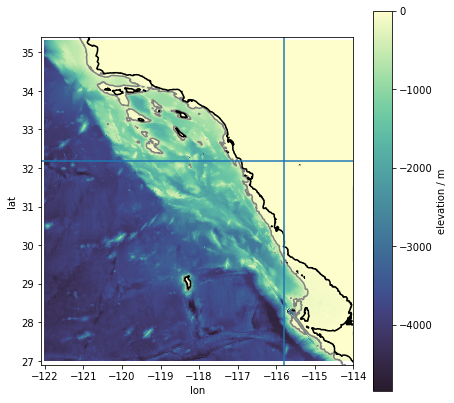

In [6]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
pc = ax.pcolormesh(lon[lon1:lon2],lat[lat1:lat2], elev[lat1:lat2,lon1:lon2], cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
cn = ax.contour(lon, lat, -elev, colors='0.5', levels=[250])
cn = ax.contour(lon, lat, -elev, colors='k', levels=[0])
ax.axhline(lat[lat2-750])
ax.axvline(lon[lon2-430])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_xlim(-122.1,-114)
ax.set_ylim(26.9,35.4)
ax.set_aspect(1)

**Map above**: Colormesh of proposed domain 1 with land set to 0 m and bottom depth flattened at -5000 m (max depth found is 5083 m).  Black contour at 0 m depth, gray contour at -250 m depth (shelf break). There are some weird features I need to erase. For example, the track lines (I think they come from the measurement tracks) in the "trench" between the main continental shelf, and multiple coastline features on the southeast coast of the bay that I won't be able to resolve.    

In [7]:
nx = 512
ny = 612

lon_vect = np.round(np.linspace(-122.0,-114.0,nx+1), decimals=5)
lat_vect = np.round(np.linspace(27.0,35.3,ny+1), decimals=5)

f_interp = sci_interp.interp2d(lon,lat,elev)

In [8]:
bathy = f_interp(lon_vect,lat_vect)

<ipython-input-9-23efb1a3f1b0>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon_vect, lat_vect, bathy, cmap=cmo.cm.deep_r)
<ipython-input-9-23efb1a3f1b0>:5: UserWarning: No contour levels were found within the data range.
  ax.contour(lon_vect,lat_vect,  -bathy, colors='k', levels=[0])


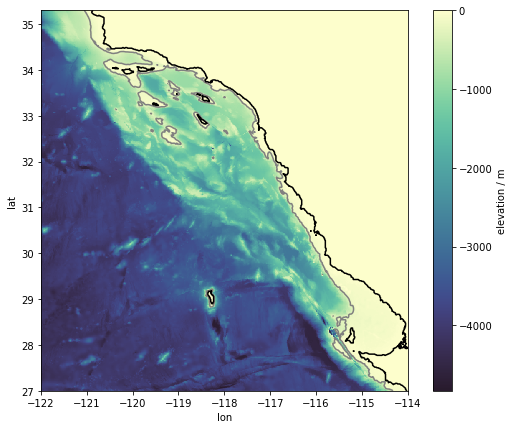

In [9]:
fig, ax = plt.subplots(1,1,figsize=(9,7))
pc = ax.pcolormesh(lon_vect, lat_vect, bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
ax.contour(lon_vect,lat_vect, -bathy, colors='0.5', levels=[250])
ax.contour(lon_vect,lat_vect,  -bathy, colors='k', levels=[0])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ax.set_aspect(1)

In [10]:
def smooth(array):
    filtered = (array[:-1,1:]+array[1:,1:]+array[1:,:-1]+array[1:,1:])/4
    return(filtered)

In [11]:
smooth_bathy = (smooth(bathy))

# Add walls 
smooth_bathy[:,-1] = 0 # east
#smooth_bathy[0,:] = 0 # south
#smooth_bathy[-1,:] = 0 # north
#smooth_bathy[:,0] = 0 # west


<ipython-input-12-49f080971bfa>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], smooth_bathy, cmap=cmo.cm.deep_r)
<ipython-input-12-49f080971bfa>:5: UserWarning: No contour levels were found within the data range.
  ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])
<ipython-input-12-49f080971bfa>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc1 = ax1.pcolormesh(lon_vect[1:], lat_v

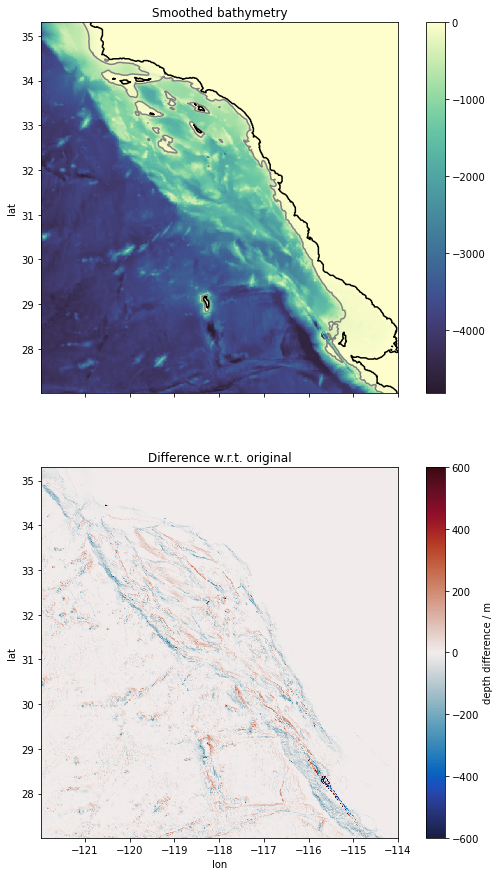

In [12]:
fig, (ax,ax1) = plt.subplots(2,1,figsize=(10,15), sharex=True)
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], smooth_bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc, ax=ax)
ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])

pc1 = ax1.pcolormesh(lon_vect[1:], lat_vect[1:],
                     smooth_bathy-bathy[1:,1:], 
                     cmap=cmo.cm.balance, vmin=-600, vmax=600)
cb = plt.colorbar(pc1, ax=ax1)

cb.set_label('depth difference / m')
ax1.set_xlabel('lon')
ax.set_ylabel('lat')
ax1.set_ylabel('lat')
ax.set_title('Smoothed bathymetry')
ax1.set_title('Difference w.r.t. original')
ax.set_aspect(1)
ax1.set_aspect(1)

### Final clean up

Remove 1-cell islands and puddles on land

In [13]:
smooth_bathy[358,116]=smooth_bathy[358,117]
# uff, there's lots to fix...

<ipython-input-14-cae07c48f53b>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)


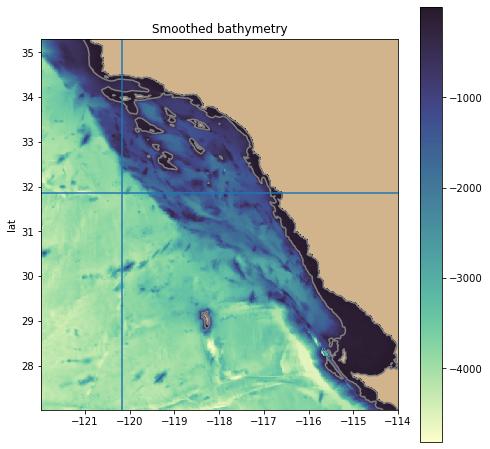

In [14]:
fig, (ax) = plt.subplots(1,1,figsize=(8,8), sharex=True)
mask_smooth = np.ma.masked_values(smooth_bathy,0)
mask = np.ma.getmask(mask_smooth)
depths = np.ma.masked_array(smooth_bathy, mask=mask)
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax)
ax.axvline(lon_vect[117])
ax.axhline(lat_vect[359])

ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[0,250])
#ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])
ax.set_ylabel('lat')
ax.set_title('Smoothed bathymetry')
ax.set_aspect(1)


### Extra SMOOTHING 

<ipython-input-15-b62c31e753f6>:83: RuntimeWarning: invalid value encountered in true_divide
  rx=abs(h[0:M,1:L]-h[0:M,0:Lm])/(h[0:M,1:L]+h[0:M,0:Lm])
<ipython-input-15-b62c31e753f6>:84: RuntimeWarning: invalid value encountered in true_divide
  ry=abs(h[1:M,0:L]-h[0:Mm,0:L])/(h[1:M,0:L]+h[0:Mm,0:L])
<ipython-input-15-b62c31e753f6>:127: RuntimeWarning: divide by zero encountered in log
  h=np.log(h)
<ipython-input-15-b62c31e753f6>:185: UserWarning: No contour levels were found within the data range.
  axx.contour(-smooth_bathy, levels=[0], colors='r')
<ipython-input-15-b62c31e753f6>:186: UserWarning: No contour levels were found within the data range.
  axx.contour(HH, levels=[0], colors='k')
<ipython-input-15-b62c31e753f6>:192: UserWarning: No contour levels were found within the data range.
  ax3.contour(-smooth_bathy, levels=[0], colors='r')
<ipython-input-15-b62c31e753f6>:193: UserWarning: No contour levels were found within the data range.
  ax3.contour(HH2, levels=[0], colors='k'

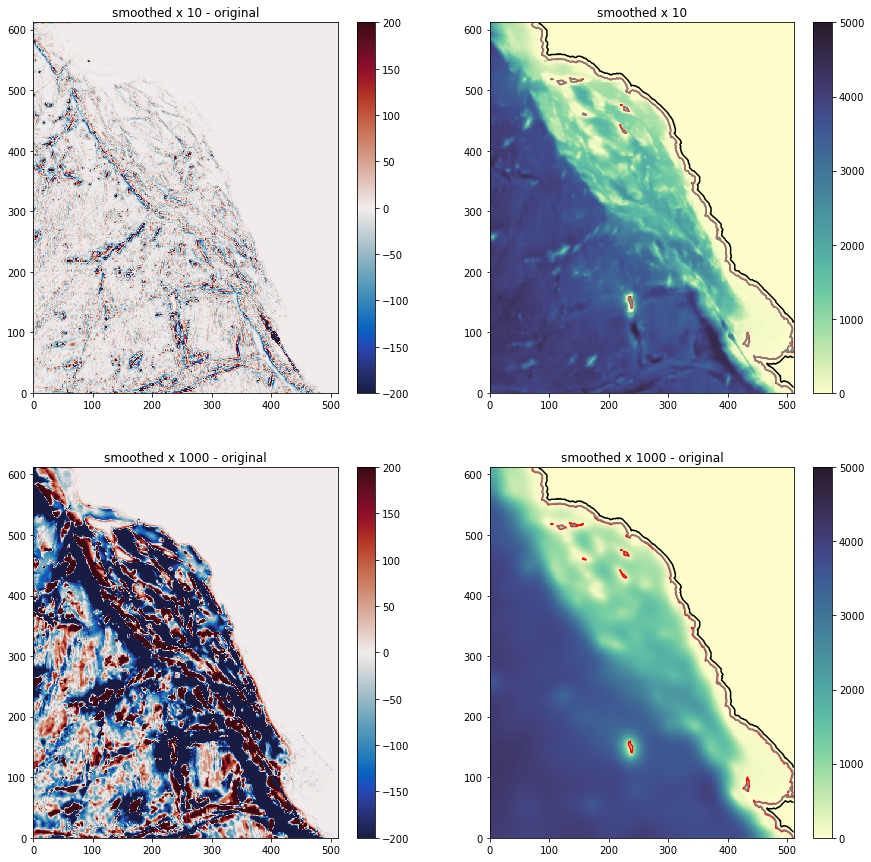

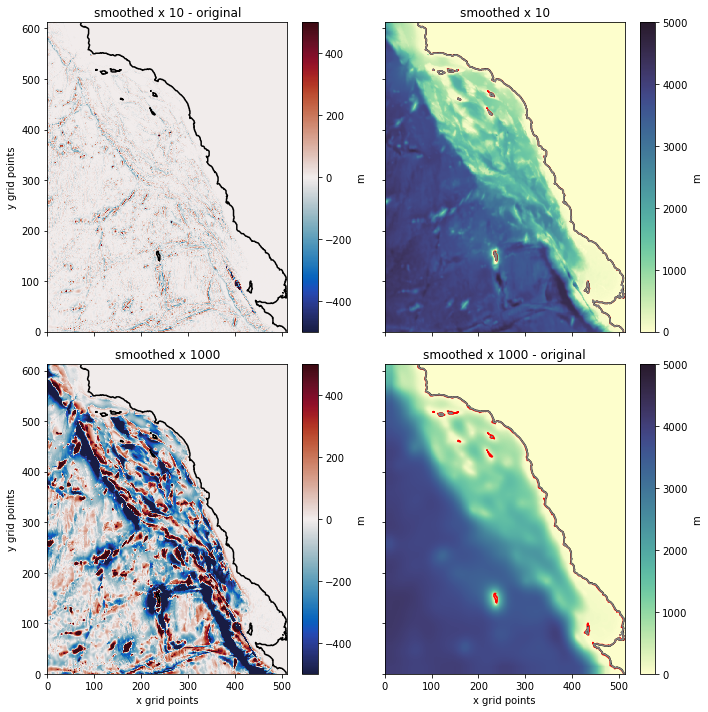

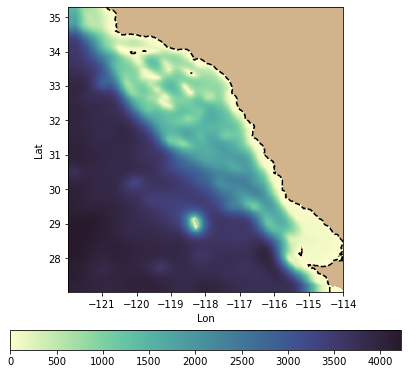

In [15]:
def smoothgrid(h,hmin,hmax,hmax_coast,rmax,n_filter_deep_topo,n_filter_final):
    '''Function adapted from 
       https://rydsphd.wordpress.com/2011/09/20/smoothing-function-used-for-bathymetry/
       Smooth the topography to get a maximum r factor = rmax.
       
       h: np. array (bathymetry, positive)
       hmin: float, cutoff value of bathymetry (0 m)
       hmax: float, max depth at which to cut off bathymetry (5000 m)
       n_filter_deep_topo: Number of pass of a selective filter to reduce the isolated 
                           seamounts on the deep ocean.
       n_filter_final: Number of pass of a single hanning filter at the end of the
                       procedure to ensure that there is no 2DX noise in the topography.
       Further Information: http://www.brest.ird.fr/Roms_tools/

       Updated    Aug-2006 by Pierrick Penven'''

    # Chop the topography at min and max values
    h[h<hmin] = hmin
    h[h>hmax] = hmax
    
    # Step 1: Deep Ocean Filter (remove isolated seamounts)
    if n_filter_deep_topo >= 1:
    #  Build a smoothing coefficient that is a linear function
    #  of a smooth topography.
        coef=h.copy()
        for i in range(8):
            coef=hanning_smoother(coef)    # coef is a smoothed bathy
        coef=0.125*(coef/np.nanmax(coef))     # rescale the smoothed bathy
    
        for i in range(n_filter_deep_topo):
            h=hanning_smoother_coef2d(h,coef)     # smooth with avariable coef
            h[h<hmax_coast] = hmax_coast

    # Apply a selective filter on log(h) to reduce grad(h)/h.
    h = rotfilter(h,hmax_coast,rmax)

    # Smooth the topography again to prevent 2D noise
    if n_filter_final > 1:
        for i in range(n_filter_final):
            h=hanning_smoother(h)
            #h[h>hmax_coast]=hmax_coast
    h[h<hmin]=hmin
    return(h)

def hanning_smoother(h):
    M,L = np.shape(h)[0], np.shape(h)[1]
    Mm = M-1
    Mmm = M-2
    Lm = L-1
    Lmm = L-2

    h[1:Mm,1:Lm]=0.125*(h[0:Mmm,1:Lm]+h[2:M,1:Lm]+
                        h[1:Mm,0:Lmm]+h[1:Mm,2:]+
                        4*h[1:Mm,1:Lm])
    h[0,:]=h[1,:]
    h[M-1,:]=h[Mm-1,:]
    h[:,0]=h[:,1]
    h[:,L-1]=h[:,Lm-1]
    return(h)

def hanning_smoother_coef2d(h,coef):
    M,L = np.shape(h)[0], np.shape(h)[1]
    Mm = M-1
    Mmm = M-2
    Lm = L-1
    Lmm = L-2
    h[1:Mm,1:Lm]=(coef[1:Mm,1:Lm]*(h[0:Mmm,1:Lm]+h[2:M,1:Lm]+
                                  h[1:Mm,0:Lmm]+h[1:Mm,2:L])+
                  (np.ones(np.shape(coef[1:Mm,1:Lm]))-4.*coef[1:Mm,1:Lm])*h[1:Mm,1:Lm])

    h[0,:]=h[1,:]
    h[M-1,:]=h[Mm-1,:]
    h[:,0]=h[:,1]
    h[:,L-1]=h[:,Lm-1]
    return(h)

def rfact(h):
    M, L = np.shape(h)[0], np.shape(h)[1]
    Mm = M-1
    Mmm = M-2
    Lm = L-1
    Lmm = L-2
    rx=abs(h[0:M,1:L]-h[0:M,0:Lm])/(h[0:M,1:L]+h[0:M,0:Lm])
    ry=abs(h[1:M,0:L]-h[0:Mm,0:L])/(h[1:M,0:L]+h[0:Mm,0:L])
    return(rx,ry)

def FX(h):
    M, L = np.shape(h)[0], np.shape(h)[1]
    Mm=M-1
    Mmm=M-2
    Lm=L-1
    Lmm=L-2

    fx[1:Mm,:]=((h[1:Mm,1:L]-h[1:Mm,0:Lm])*5/6 +
                (h[0:Mmm,1:L]-h[0:Mmm,0:Lm]+h[2:M,1:L]-h[2:M,0:Lm])/12)

    fx[0,:]=fx[1,:]
    fx[M-1,:]=fx[Mm-1,:]
    return(fx)

def FY(h):
    M, L = np.shape(h)[0], np.shape(h)[1]
    Mm=M-1
    Mmm=M-2
    Lm=L-1
    Lmm=L-2

    fy[:,1:Lm]=((h[1:M,1:Lm]-h[0:Mm,1:Lm])*5/6 +
                (h[1:M,0:Lmm]-h[0:Mm,0:Lmm]+h[1:M,2:L]-h[1:Mm,2:L])/12)
      
    fy[:,0]=fy[:,1]
    fy[:,L-1]=fy[:,Lm-1]

    return(fy)

def rotfilter(h,hmax_coast,rmax):
    '''Apply a selective filter on log(h) to reduce grad(h)/h.'''
    M, L = np.shape(h)[0], np.shape(h)[1]
    Mm=M-1
    Mmm=M-2
    Lm=L-1
    Lmm=L-2
    cff=0.8
    nu=3/16
    rx, ry = rfact(h)
    r = np.max(np.array(np.max(rx),np.max(ry)))
    h=np.log(h)
    #hmax_coast = np.log(hmax_coast)
    i=0
    while r>rmax:
        i=i+1
        cx = float(rx>cff*rmax)
        cx = hanning_smoother(cx)
        cy = float(ry>cff*rmax)
        cy = hanning_smoother(cy)
        fx = cx*FX(h)
        fy = cy*FY(h)
        h[1:Mm,1:Lm]=(h[1:Mm,1:Lm]+
                      nu*((fx[1:Mm,1:Lm]-fx[1:Mm,0:Lmm])+
                          (fy[1:Mm,1:Lm]-fy[0:Mmm,1:Lm])))
        h[0,:] = h[1,:]
        h[M-1,:] = h[M-1,:]
        h[:,0] = h[:,1]
        h[:,L-1] = h[:,Lm-1]
        #h[h>hmax_coast] = hmax_coast
        rx, ry = rfact(np.exp(h))
        r = np.max(np.array(np.max(rx),np.max(ry)))
    h = np.exp(h)
    return(h)



# deep filter = 10
hmin = 0
hmax = 5000
hmax_coast = 0
rmax = 0.5
n_filter_deep_topo = 10
n_filter_final = 1
h2 = -smooth_bathy.copy()
HH = smoothgrid(h2,hmin,hmax,hmax_coast,rmax,n_filter_deep_topo,n_filter_final)

# deep filter = 1000

hmin = 0
hmax = 5000
hmax_coast = 0
rmax = 0.5
n_filter_deep_topo = 1000
n_filter_final = 1
h3 = -smooth_bathy.copy()
HH2 = smoothgrid(h3,hmin,hmax,hmax_coast,rmax,n_filter_deep_topo,n_filter_final)

fig,((ax,axx),(ax2,ax3)) = plt.subplots(2,2, figsize=(15,15))

pc = ax.pcolormesh(HH-(-smooth_bathy), cmap=cmo.cm.balance, vmin=-200, vmax=200)
plt.colorbar(pc, ax=ax)
ax.set_title('smoothed x 10 - original')

pc2 = ax2.pcolormesh(HH2-(-smooth_bathy), cmap=cmo.cm.balance, vmin=-200, vmax=200)
plt.colorbar(pc2,ax=ax2)
ax2.set_title('smoothed x 1000 - original')

pcx = axx.pcolormesh(HH, cmap=cmo.cm.deep, vmin=0, vmax=5000)
axx.contour(-smooth_bathy, levels=[0], colors='r')
axx.contour(HH, levels=[0], colors='k')
axx.contour(HH, levels=[0.1], colors='0.5')
plt.colorbar(pcx,ax=axx)
axx.set_title('smoothed x 10')

pc3 = ax3.pcolormesh(HH2, cmap=cmo.cm.deep, vmin=0, vmax=5000)
ax3.contour(-smooth_bathy, levels=[0], colors='r')
ax3.contour(HH2, levels=[0], colors='k')
ax3.contour(HH2, levels=[0.1], colors='0.5')
plt.colorbar(pc3,ax=ax3)
ax3.set_title('smoothed x 1000 - original')



HH_fix = HH.copy()
HH_fix[HH_fix<0.1] = 0

HH2_fix = HH2.copy()
HH2_fix[HH2_fix<0.1] = 0

fig,((ax,axx),(ax2,ax3)) = plt.subplots(2,2, figsize=(10,10), sharex=True, sharey=True)

pc = ax.pcolormesh(HH_fix-(-smooth_bathy), cmap=cmo.cm.balance, vmin=-500, vmax=500)
plt.colorbar(pc, ax=ax, label='m')
ax.contour(-smooth_bathy, levels=[0], colors='k')
ax.set_title('smoothed x 10 - original')

pc2 = ax2.pcolormesh(HH2_fix-(-smooth_bathy), cmap=cmo.cm.balance, vmin=-500, vmax=500)
plt.colorbar(pc2,ax=ax2, label='m')
ax2.contour(-smooth_bathy, levels=[0], colors='k')
ax2.set_title('smoothed x 1000')

pcx = axx.pcolormesh(HH_fix, cmap=cmo.cm.deep, vmin=0, vmax=5000)
axx.contour(-smooth_bathy, levels=[0], colors='r')
axx.contour(HH_fix, levels=[0], colors='k')
axx.contour(HH_fix, levels=[0.1], colors='0.5')
plt.colorbar(pcx,ax=axx, label='m')
axx.set_title('smoothed x 10')

pc3 = ax3.pcolormesh(HH2_fix, cmap=cmo.cm.deep, vmin=0, vmax=5000)
ax3.contour(-smooth_bathy, levels=[0], colors='r')
ax3.contour(HH2_fix, levels=[0], colors='k')
ax3.contour(HH2_fix, levels=[0.1], colors='0.5')
plt.colorbar(pc3,ax=ax3, label='m')
ax3.set_title('smoothed x 1000 - original')
ax3.set_xlabel('x grid points')
ax2.set_xlabel('x grid points')
ax2.set_ylabel('y grid points')
ax.set_ylabel('y grid points')
plt.tight_layout()

### Flatten topo at open boundaries

for ii in range(15):
    HH2_fix[:,ii] = HH2_fix[:,15]

for ii in range(15):
    HH2_fix[ii,:] = HH2_fix[15,:]

depths_smooth = np.ma.masked_array(HH2_fix, mask=mask)

# Plot to check
fig, (ax) = plt.subplots(1,1,figsize=(7,7), sharex=True, sharey=True)
ax.set_facecolor('tan')
ax2.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_smooth, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax, orientation='horizontal',pad=0.1)

ax.contour(lon_vect[1:],lat_vect[1:], -HH2_fix, colors='k', linewidth=1, levels=[-0.01])
ax.set_ylabel('Lat')
ax.set_xlabel('Lon')
ax.set_aspect(1)

## Remove the bay

First try: Take shelf slope at A and propagate it south along the shelf break isobath for every j-index (N-S index) up to Punta Euguenia.

The depth at A1 is -303.50 m and at A2 is -2.95 m
The lat at A1 is 29.81


<ipython-input-18-1ac7ec1567fa>:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_smooth, cmap=cmo.cm.deep)


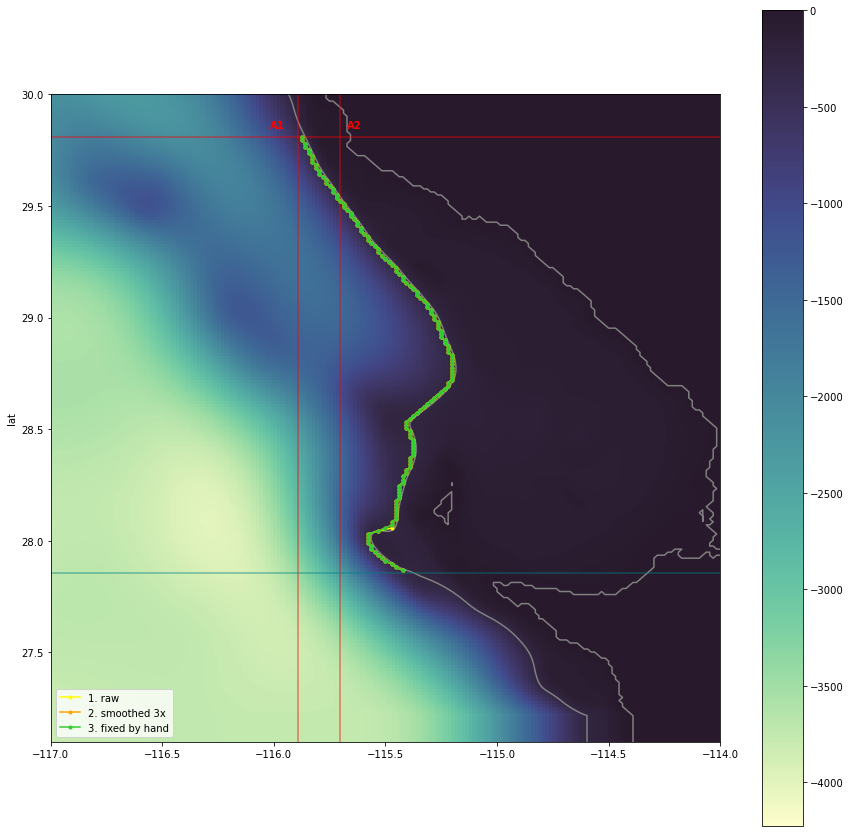

In [18]:
depths_smooth = -HH2_fix.copy()

isobath = 250 # shelf break depth

# Initial and final points at A to get the slope
aj = 177+30
ai1 = 328+63
ai2 = 340+63
print('The depth at A1 is %1.2f m and at A2 is %1.2f m' %(depths_smooth[aj,ai1],depths_smooth[aj,ai2]))
print('The lat at A1 is %1.2f' %(lat_vect[aj]))

# Punta Eugenia j index
pej = 63

# For each y index, find the x index of the point closest to 250 m isobath.
raw_iind = np.argmin(np.abs(depths_smooth[pej:aj,ai1-20:]+isobath), axis=1)

iind=raw_iind.copy()

# Smooth out jumps in 3 passes
for ii in range(len(iind)-1):
    if abs(iind[ii]-iind[ii+1]) >= 10:
        iind[ii+1] = max(iind[ii],iind[ii+1])#int((iind[ii]+iind[ii+1])/2)

for ii in range(len(iind)-1):
    if abs(iind[ii]-iind[ii+1]) > 4:
        iind[ii+1] = int((iind[ii]+iind[ii+1])/2)

for ii in range(len(iind)-1):
    if abs(iind[ii]-iind[ii+1]) > 3:
        iind[ii+1] = int((iind[ii]+iind[ii+1])/2)

# Fix the rest by hand - nothing to fix in this case
iind_fixed = iind.copy()

# Add slope (depths_smooth) from A at each iind
depths_smooth_noSVB = depths_smooth.copy()
for ii, ind in zip(range(pej,aj),iind_fixed):
    depths_smooth_noSVB[ii,ind:ind+(ai2-ai1)]=depths_smooth[ii,ai1:ai2]

# Plot to check
fig, (ax) = plt.subplots(1,1,figsize=(15,15), sharex=True)
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_smooth, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax)

ax.axvline(lon_vect[ai2], color='r', alpha=0.5)
ax.axvline(lon_vect[ai1], color='r', alpha=0.5)
ax.axhline(lat_vect[aj], color='r', alpha=0.5)
ax.text(lon_vect[342+63],lat_vect[180+30],'A2', color='r', fontweight='bold')
ax.text(lon_vect[320+63],lat_vect[180+30],'A1', color='r', fontweight='bold')
ax.axhline(lat_vect[pej], color='teal', alpha=0.5)

ax.plot(lon_vect[raw_iind+ai1-20],lat_vect[pej+1:aj+1],'.-', color='yellow', label='1. raw')
ax.plot(lon_vect[iind+ai1-20],lat_vect[pej+1:aj+1],'.-', color='orange', label='2. smoothed 3x')
ax.plot(lon_vect[iind_fixed+ai1-20],lat_vect[pej+1:aj+1],'.-', color='limegreen', label='3. fixed by hand')

ax.contour(lon_vect[1:],lat_vect[1:], -depths_smooth, colors='0.5', levels=[0,250])
ax.set_ylabel('lat')
ax.set_aspect(1)
ax.set_xlim(-117, -114)
ax.set_ylim(27.1,30)
ax.legend()

Once we have the indices of the shelf break, we propagate the shelf profile from A south up to Punta Eugenia:

<ipython-input-19-477a587251b8>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_noSVB, cmap=cmo.cm.deep, vmin=-1000, vmax=0)


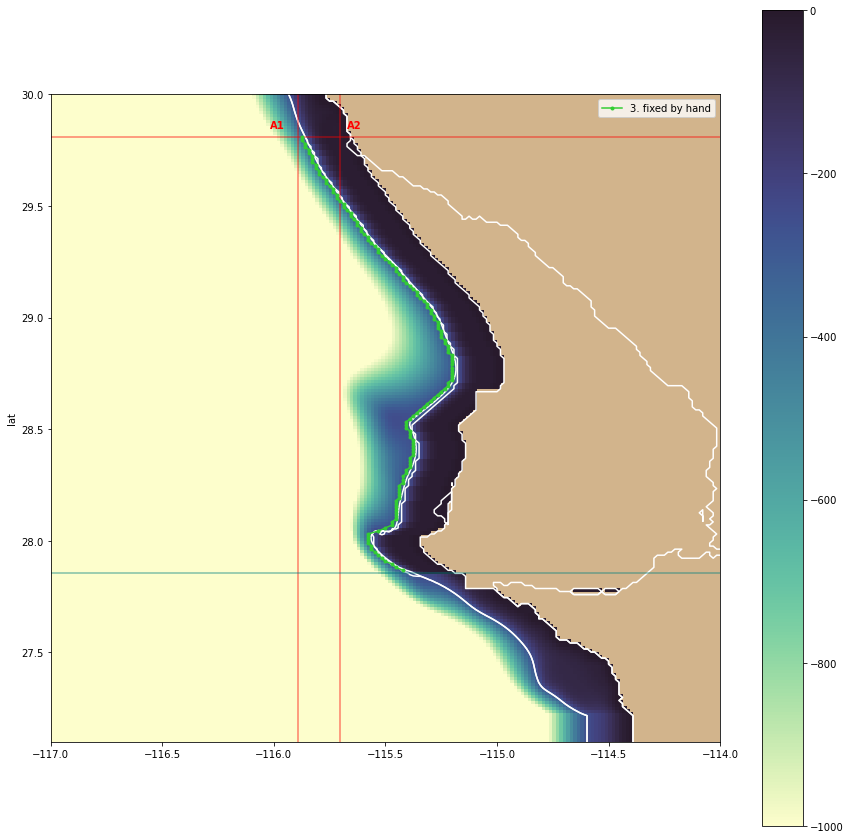

In [19]:
# Add slope (depths) from A at each iind
bathy_noSVB = depths_smooth.copy()
for ii, ind in zip(range(pej-1,aj),iind_fixed):
    bathy_noSVB[ii,ind+ai1-20:ind+ai1-20+(ai2+61-ai1)]=depths_smooth[aj,ai1:ai2+61]

# Fill out missing bits in the bay
bathy_noSVB[pej-6:pej,iind_fixed[0]+ai1-3:]=0.0
bathy_noSVB[pej:pej+60,iind_fixed[0]+ai1:]=0.0

# Plot to check
mask_bat = np.ma.masked_values(bathy_noSVB,0)
mask_noSVB = np.ma.getmask(mask_bat)
depths_noSVB = np.ma.masked_array(bathy_noSVB, mask=mask_noSVB)

fig, (ax) = plt.subplots(1,1,figsize=(15,15), sharex=True)
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_noSVB, cmap=cmo.cm.deep, vmin=-1000, vmax=0)
cb = plt.colorbar(pc, ax=ax)

ax.axvline(lon_vect[ai2], color='r', alpha=0.5)
ax.axvline(lon_vect[ai1], color='r', alpha=0.5)
ax.axhline(lat_vect[aj], color='r', alpha=0.5)
ax.text(lon_vect[342+63],lat_vect[180+30],'A2', color='r', fontweight='bold')
ax.text(lon_vect[320+63],lat_vect[180+30],'A1', color='r', fontweight='bold')
ax.axhline(lat_vect[pej], color='teal', alpha=0.5)

ax.plot(lon_vect[iind_fixed+ai1-20],lat_vect[pej+1:aj+1],'.-', color='limegreen', label='3. fixed by hand')
ax.contour(lon_vect[1:],lat_vect[1:], -depths_smooth, colors='w', levels=[0,250])
ax.contour(lon_vect[1:],lat_vect[1:], -bathy_noSVB, colors='w', levels=[0,250])

ax.set_ylabel('lat')
ax.set_aspect(1)
ax.set_xlim(-117, -114)
ax.set_ylim(27.1,30)
ax.legend()

<ipython-input-20-49f74ee34fb8>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_noSVB, cmap=cmo.cm.deep)
<ipython-input-20-49f74ee34fb8>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc2 = ax2.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)
<ipython-input-20-49f74ee34fb8>:10: UserWarning: No contour levels were found within the data range.
  ax.contour(lon_vect[1:],lat_vect[1:], -depths

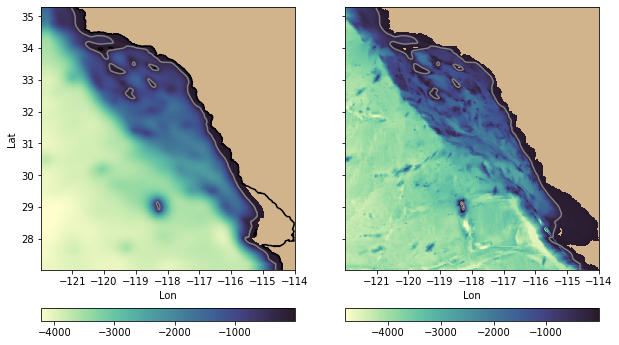

In [20]:
# Plot to check
fig, (ax,ax2) = plt.subplots(1,2,figsize=(10,7), sharex=True, sharey=True)
ax.set_facecolor('tan')
ax2.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_noSVB, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax, orientation='horizontal',pad=0.1)
pc2 = ax2.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)
cb2 = plt.colorbar(pc2, ax=ax2, orientation='horizontal',pad=0.1)

ax.contour(lon_vect[1:],lat_vect[1:], -depths_smooth, colors='k', linewidth=1, levels=[0])
ax.contour(lon_vect[1:],lat_vect[1:], -bathy_noSVB, colors='0.5', levels=[250])
ax2.contour(lon_vect[1:],lat_vect[1:], -depths_smooth, colors='0.5', levels=[250])
ax.set_ylabel('Lat')
ax.set_xlabel('Lon')
ax2.set_xlabel('Lon')
ax.set_aspect(1)
ax2.set_aspect(1)


### Flatten topo at open boundaries

<ipython-input-21-ec3745872604>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_noSVB, cmap=cmo.cm.deep)
<ipython-input-21-ec3745872604>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pc2 = ax2.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)
<ipython-input-21-ec3745872604>:18: UserWarning: No contour levels were found within the data range.
  ax.contour(lon_vect[1:],lat_vect[1:], -smoo

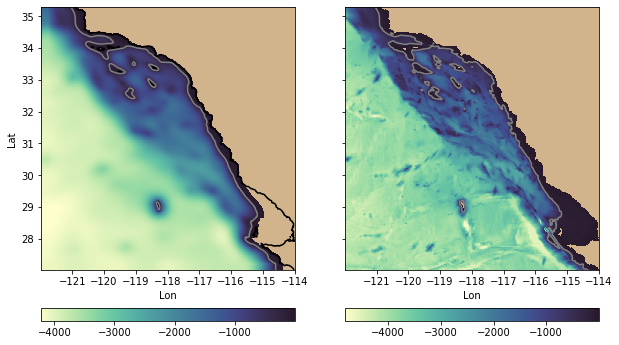

In [21]:
for ii in range(15):
    bathy_noSVB[:,ii] = bathy_noSVB[:,15]

for ii in range(15):
    bathy_noSVB[ii,:] = bathy_noSVB[15,:]

depths_noSVB = np.ma.masked_array(bathy_noSVB, mask=mask_noSVB)

# Plot to check
fig, (ax,ax2) = plt.subplots(1,2,figsize=(10,7), sharex=True, sharey=True)
ax.set_facecolor('tan')
ax2.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], depths_noSVB, cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax, orientation='horizontal',pad=0.1)
pc2 = ax2.pcolormesh(lon_vect[1:],lat_vect[1:], depths, cmap=cmo.cm.deep)
cb2 = plt.colorbar(pc2, ax=ax2, orientation='horizontal',pad=0.1)

ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', linewidth=1, levels=[0])
ax.contour(lon_vect[1:],lat_vect[1:], -bathy_noSVB, colors='0.5', levels=[250])
ax2.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
ax.set_ylabel('Lat')
ax.set_xlabel('Lon')
ax2.set_xlabel('Lon')
ax.set_aspect(1)
ax2.set_aspect(1)


### Binary file

In [22]:
# Build grid spacing vectors dx and dy 
delx = lon_vect[1:]-lon_vect[:-1]
dely = lat_vect[1:]-lat_vect[:-1]
dx = np.append(delx, [delx[-1]], axis=0) # This is not the best way to do this
dy = np.append(dely, [dely[-1]], axis=0)

In [23]:
dx

array([0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562,
       0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562,
       0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562,
       0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562,
       0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562,
       0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563, 0.01562,
       0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563, 0.01563,
       0.01562, 0.01562, 0.01563, 0.01563, 0.01562, 0.01562, 0.01563,
       0.01563, 0.01

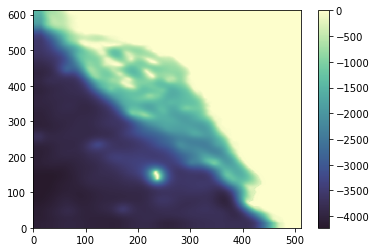

In [24]:
bathy_fname = '512x612/domain5_512x612_noSVB_smooth1000_bat.bin'
dx_fname = '512x612/domain5_512x612_smooth1000_dx.bin'
dy_fname = '512x612/domain5_512x612_smooth1000_dy.bin'

dt = np.dtype('>f8')  # float 64 big endian

fileobj = open(dx_fname,mode='wb')
dx.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(dy_fname, mode='wb')
dy.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(bathy_fname, mode='wb')
dd=bathy_noSVB
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

plt.pcolor(dd, cmap=cmo.cm.deep_r)
plt.colorbar()
plt.show()

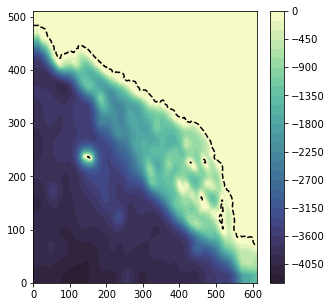

In [25]:
# Check it is read correctly
cc=np.fromfile(bathy_fname, dtype=dt)
np.shape(cc)

bF=np.reshape(cc,[nx,ny],'F') # F to read in Fortran order

fig,ax = plt.subplots(1,1, figsize=(5,5))

pc = ax.contourf(bF, 40, cmap=cmo.cm.deep_r)
pc2 = ax.contour(bF, levels=[-10], colors='k')

plt.colorbar(pc,ax=ax)
